**Exercici 1
Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from scipy import stats
from scipy.stats import shapiro
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_uefa = pd.read_csv('/home/sole/Documents/DS/Sprint 5/Lligues europees UEFA.csv',sep= ";",encoding='latin-1')
df_uefa.to_csv('/home/sole/Documents/DS/Sprint 5/Tasca_M05_T01_csv.csv', index=False)
df_uefa.head(10)

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas
5,6,Milan,ITA,1,37,25,8,4,66,31,...,83,2.24,60.0,34.4,25.6,0.69,W W W W W,42388,Rafael Leão - 11,Mike Maignan
6,7,Inter,ITA,2,37,24,9,4,81,32,...,81,2.19,78.1,38.2,39.9,1.08,W L W W W,41995,Lautaro Martínez - 21,Samir Handanovi?
7,8,Napoli,ITA,3,37,23,7,7,71,31,...,76,2.05,58.5,29.9,28.6,0.77,D L W W W,26681,Victor Osimhen - 14,David Ospina
8,9,Dortmund,GER,2,34,22,3,9,85,52,...,69,2.03,62.8,43.2,19.6,0.58,W L L W W,41800,Erling Haaland - 22,Gregor Kobel
9,10,Barcelona,ESP,2,37,21,10,6,68,36,...,73,1.97,61.3,35.2,26.1,0.71,L W W W D,53933,Memphis Depay - 12,Marc-André ter Stegen


In [3]:
df_uefa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

**Breve descripción del archivo y de las columnas**
Es un archivo donde se nos muestran estadísticas de todos los equipos de las 5 ligas más potentes en Europa: Inglaterra, España, Italia, Francia y Alemania)

Rk: Ranking UEFA.
Squad: Nombre del equipo.
Country: Pais.
LgRk: Ranking en la liga.
MP: Partidos jugados (W+D+L).
W: Partidos ganados.
D: Partidos empatados.
L: Partidos perdidos.
GF: Goles a favor.
GA: Goles en contra.
GD: Diferencia de goles (GF-GA).
Pts: Puntos conseguidos en la liga (Wx3 + Dx1).
Pts/G: Media de puntos por partido (Pts/MP).
xG: Goles a favor esperados en una liga.
xGA: Goles en contra esperados en una liga.
xGD: Diferencia entre los goles esperados a favor y en contra (xG-xGA).
xGD/90: Diferencia de goles esperada por cada partido (xGD/MP).
Last 5: Los resultados en los 5 últimos partidos.
Attendance: Asistencia media a los partidos.
Top Team Scorer: Nombre del máximo goleador del equipo y número de goles 
Goalkeeper: Nombre del portero titular.

In [4]:
print(df_uefa.describe())

              Rk       LgRk         MP          W          D         L  \
count  98.000000  98.000000  98.000000  98.000000  98.000000  98.00000   
mean   49.500000  10.316327  36.306122  13.448980   9.408163  13.44898   
std    28.434134   5.706926   1.152390   5.747474   2.903381   5.12347   
min     1.000000   1.000000  34.000000   3.000000   3.000000   2.00000   
25%    25.250000   5.250000  36.000000   9.000000   7.000000  10.00000   
50%    49.500000  10.000000  37.000000  13.000000   9.000000  13.00000   
75%    73.750000  15.000000  37.000000  17.000000  11.000000  17.00000   
max    98.000000  20.000000  37.000000  28.000000  16.000000  26.00000   

              GF         GA         GD        Pts      Pts/G         xG  \
count  98.000000  98.000000  98.000000  98.000000  98.000000  98.000000   
mean   50.877551  50.877551   0.000000  49.734694   1.370204  48.653061   
std    16.102933  13.634602  26.501896  16.166371   0.443903  12.453950   
min    23.000000  24.000000 -56.0

In [5]:
print(df_uefa.nunique())

Rk                 98
Squad              98
Country             5
LgRk               20
MP                  3
W                  25
D                  13
L                  24
GF                 47
GA                 48
GD                 61
Pts                52
Pts/G              61
xG                 87
xGA                88
xGD                91
xGD/90             77
Last 5             80
Attendance         98
Top Team Scorer    98
Goalkeeper         98
dtype: int64


In [6]:
#Comprobamos si hay valores nulos o Nan
df_uefa.isna().sum()
print("No existe ningún Nan")
df_uefa.isnull().sum()
print("No existe ningún null")

No existe ningún Nan
No existe ningún null


Vamos a separar la información de la columna "Top Team Scorer" en 2 nuevas columnas: "Top Team Scorer" con el nombre del goleador y "Goals" con el número de goles marcados. 

In [7]:
df_uefa['Goals'] = df_uefa['Top Team Scorer'].str.extract(r"(\d+)$")
df_uefa['Top Team Scorer'] = df_uefa['Top Team Scorer'].str.replace(r"\s-\s\d+", '', regex=True)
df_uefa.head(10)

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Goals
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne,Ederson,15
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah,Alisson,22
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema,Thibaut Courtois,27
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski,Manuel Neuer,35
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé,Keylor Navas,25
5,6,Milan,ITA,1,37,25,8,4,66,31,...,2.24,60.0,34.4,25.6,0.69,W W W W W,42388,Rafael Leão,Mike Maignan,11
6,7,Inter,ITA,2,37,24,9,4,81,32,...,2.19,78.1,38.2,39.9,1.08,W L W W W,41995,Lautaro Martínez,Samir Handanovi?,21
7,8,Napoli,ITA,3,37,23,7,7,71,31,...,2.05,58.5,29.9,28.6,0.77,D L W W W,26681,Victor Osimhen,David Ospina,14
8,9,Dortmund,GER,2,34,22,3,9,85,52,...,2.03,62.8,43.2,19.6,0.58,W L L W W,41800,Erling Haaland,Gregor Kobel,22
9,10,Barcelona,ESP,2,37,21,10,6,68,36,...,1.97,61.3,35.2,26.1,0.71,L W W W D,53933,Memphis Depay,Marc-André ter Stegen,12


In [8]:
df_uefa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

In [9]:
# Convertimos el tipo de "Goals" en Integer.
df_uefa['Goals'] = df_uefa.Goals.astype(int)
df_uefa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

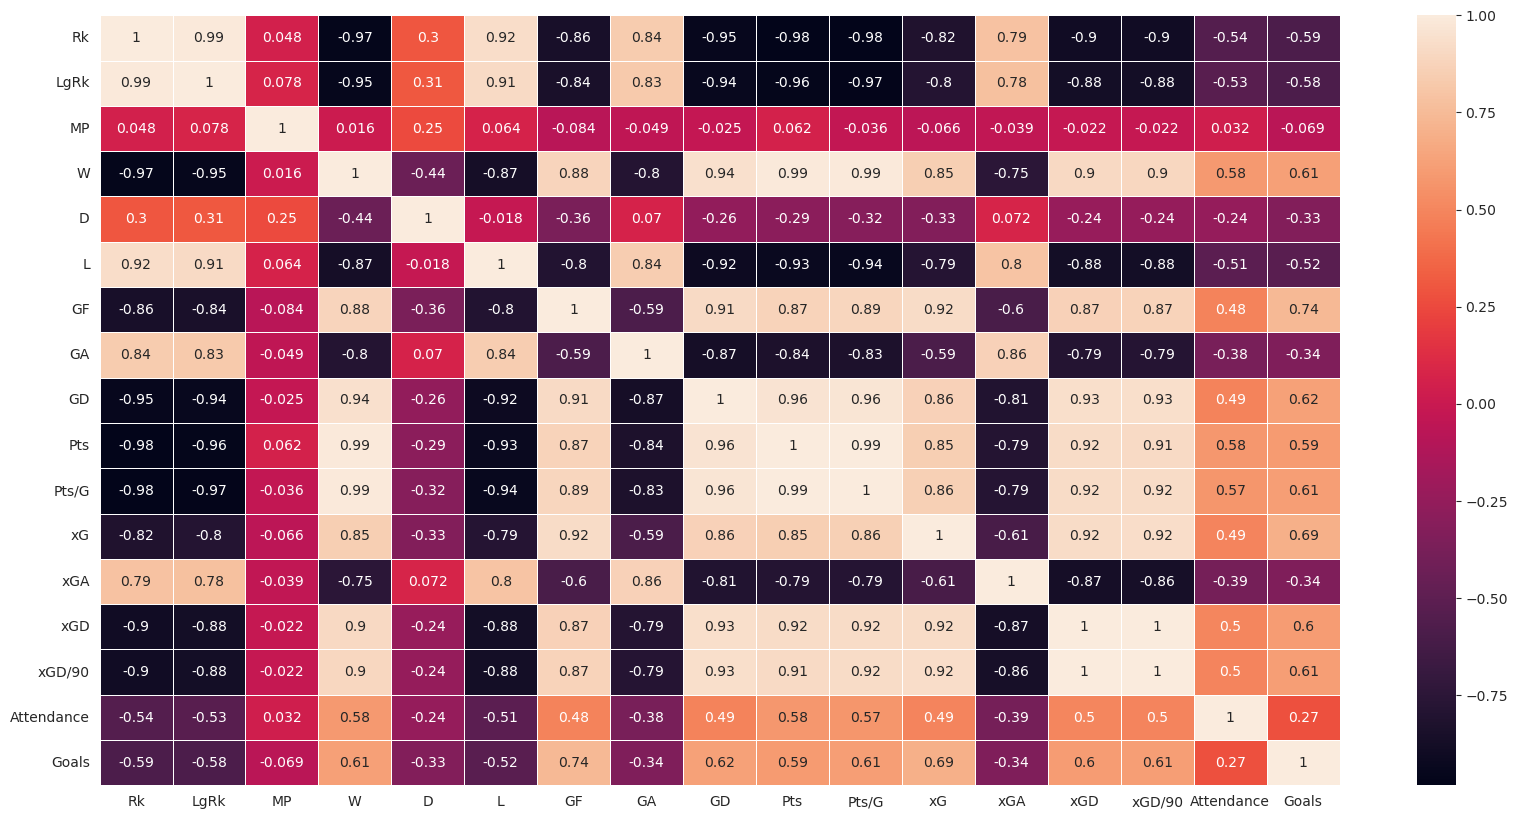

In [10]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df_uefa.corr(), annot=True, ax=ax,linewidth=.5, cmap="rocket")
plt.show()

Podemos ver que existe una correlación muy alta entre varios valores, destacando la existente entre "Rk" y "LgRk" y "W" ,"Pts" y "Pts/G" con un valor del 0.99. Por otro lado, tenemos valores con una correlación muy baja cómo por ejemplo la existente entre "MP" y "Attendance" con 0.032 o la existente entre "MP" y "W" con 0.016. En concreto podemos destacar que los partidos jugados por los equipos "MP" no tienen correlación con el resto de variables.
En este análisis, estamos evaluando si el campo "Pts/G" (media de puntos por partido) sigue una distribución normal. Utilizamos la prueba de Shapiro-Wilk para este propósito, donde la hipótesis nula (H0) asume que la distribución de los datos es gaussiana, mientras que la hipótesis alternativa (HA) sostiene lo contrario.
Además de la prueba estadística, proporcionaré información visual mediante un histograma y un gráfico de densidad. Estos gráficos permiten observar la forma de la distribución de los datos. La combinación de la prueba estadística y las representaciones visuales busca proporcionar una comprensión completa sobre si el campo "Pts/G" sigue o no una distribución gaussiana.

In [11]:
stat, p = stats.shapiro(df_uefa['Pts/G'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza la hipótesis nula. La distribución es gaussiana')
else:
    print('Se rechaza la hipótesis nula. La distribución no es gaussiana')

stat=0.972, p=0.035
Se rechaza la hipótesis nula. La distribución no es gaussiana


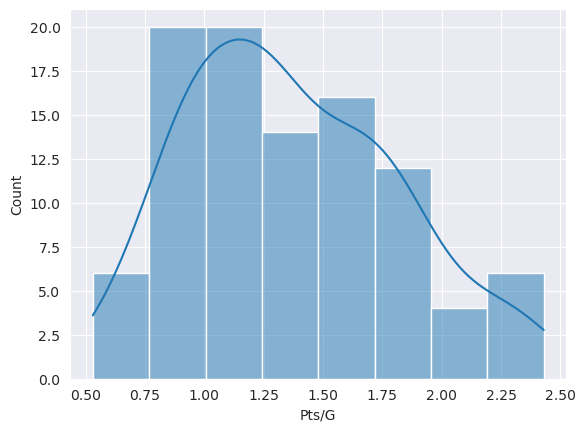

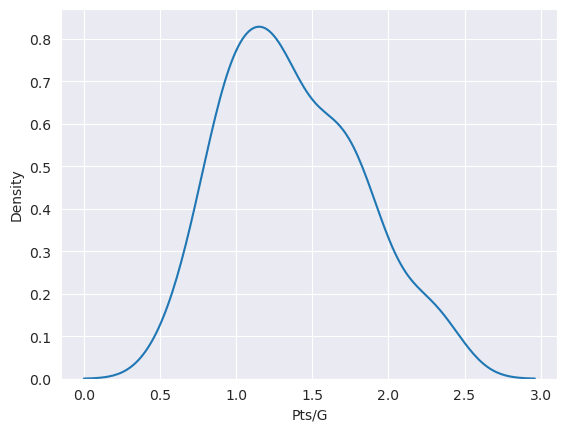

In [25]:
sns.histplot(df_uefa['Pts/G'], kde=True)
plt.show()

sns.kdeplot(df_uefa['Pts/G'])
plt.show()

**Exercici 2
Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.**

Para este ejercicio he decidido comprobar si la distribución entre las variables "W" y "Goals" (partidos ganados por el equipo y los goles de su máximo goleador) es igual o no.

Como primer paso tenemos que ver si ambas variables tienen una distribución gaussiana, por lo que aplicamos el test Shapiro-Wilk a ambas.

In [26]:
stat, p = shapiro(df_uefa['W'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza la hipótesis nula. La distribución es gaussiana')
else:
    print('Se rechaza la hipótesis nula. La distribución no es gaussiana')

stat=0.965, p=0.011
Se rechaza la hipótesis nula. La distribución no es gaussiana


In [27]:
stat, p = shapiro(df_uefa['Goals'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza la hipótesis nula. La distribución es gaussiana')
else:
    print('Se rechaza la hipótesis nula. La distribución no es gaussiana')

stat=0.883, p=0.000
Se rechaza la hipótesis nula. La distribución no es gaussiana


Al no tener una distribución gaussiana les aplicaré el Mann-Whitney U Test. 

In [28]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(df_uefa['W'], df_uefa['Goals'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza la hipótesis nula. Probablemente es la misma distribución')
else:
    print('Se rechaza la hipótesis nula. Probablemente no es la misma distribución')

stat=5284.000, p=0.224
No se rechaza la hipótesis nula. Probablemente es la misma distribución


Podemos ver que aunque las variables son independientes, es probable que las distribuciones sean similares.

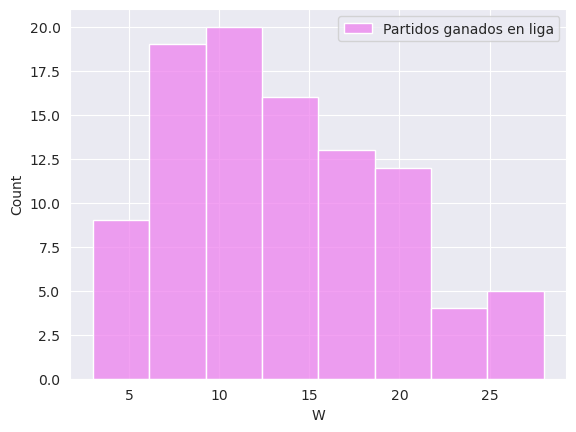

In [29]:
sns.histplot(df_uefa['W'], label= 'Partidos ganados en liga', color= 'violet', fill = True)
plt.legend()
plt.show()

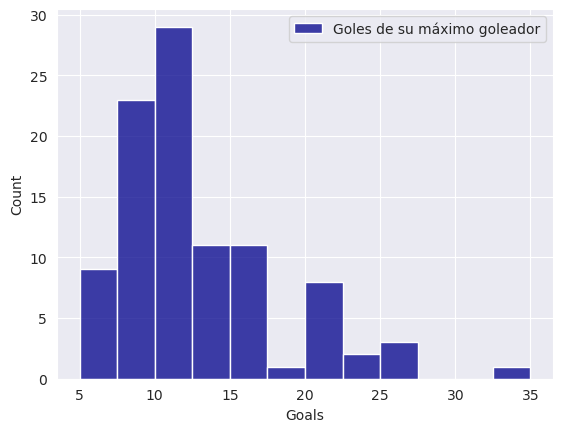

In [30]:
sns.histplot(df_uefa['Goals'], label= 'Goles de su máximo goleador', color= 'darkblue', fill = True)
plt.legend()
plt.show()

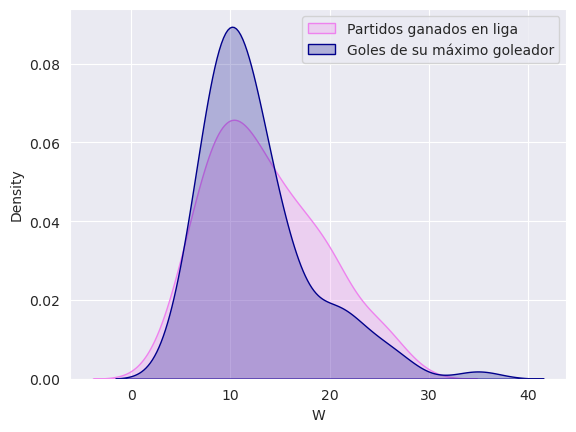

In [31]:
sns.kdeplot(df_uefa['W'], label= 'Partidos ganados en liga', color= 'violet', fill = True)
sns.kdeplot(df_uefa['Goals'], label= 'Goles de su máximo goleador', color= 'darkblue', fill = True)
plt.legend()
plt.show()

**Exercici 3
Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.**
Para este ejercicio las 3 variables seleccionadas serán: "Pts","GF" y "GA" y comprobaremos si la distribución es similar. Como primer paso tenemos que ver si las variables tienen una distribución gaussiana, por lo que aplicamos Shapiro-Wilk a ambas.

In [32]:
stat, p = shapiro(df_uefa['Pts'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza la hipótesis nula. La distribución es gaussiana')
else:
    print('Se rechaza la hipótesis nula. La distribución no es gaussiana')

stat=0.972, p=0.035
Se rechaza la hipótesis nula. La distribución no es gaussiana


In [33]:
stat, p = shapiro(df_uefa['GF'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza la hipótesis nula. La distribución es gaussiana')
else:
    print('Se rechaza la hipótesis nula. La distribución no es gaussiana')

stat=0.943, p=0.000
Se rechaza la hipótesis nula. La distribución no es gaussiana


In [34]:
stat, p = shapiro(df_uefa['GA'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza la hipótesis nula. La distribución es gaussiana')
else:
    print('Se rechaza la hipótesis nula. La distribución no es gaussiana')

stat=0.983, p=0.243
No se rechaza la hipótesis nula. La distribución es gaussiana


En este caso sólo la variable GA presenta una distribución gaussiana, por lo que aplicaremos la prueba de Kruskall-Wallis para comprobar si las distribuciones son similares.

In [35]:
stat, p = stats.kruskal(df_uefa['Pts'], df_uefa['GF'], df_uefa['GA'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No se rechaza la H0. La distribucion de las variables son similares')
else:
    print('Se rechaza la H0. Las distribución de las variables es diferente')

stat=0.667, p=0.716
No se rechaza la H0. La distribucion de las variables son similares


Podemos observar que se cumple la hipótesis nula por lo que podemos afirmar que las 3 variables tienen distribuciones similares. Realizamos un boxplot y un kdeplot para visualizarlo.

<Axes: >

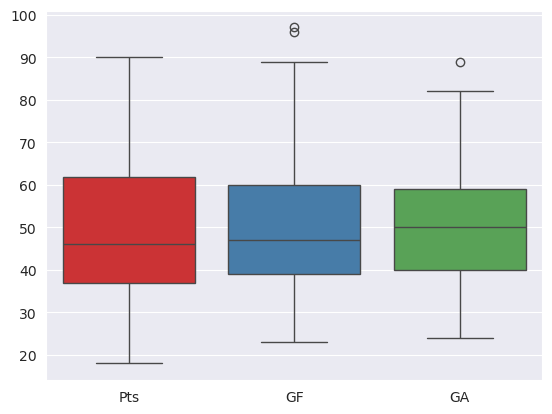

In [36]:
sns.boxplot(data=df_uefa[['Pts', 'GF', 'GA']], palette="Set1")

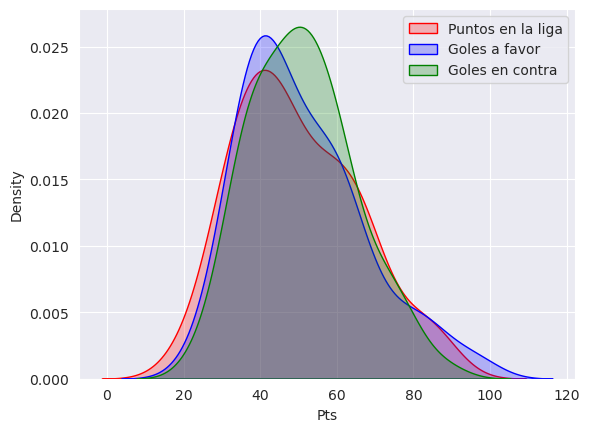

In [37]:
sns.kdeplot(df_uefa['Pts'], label= 'Puntos en la liga', color= 'red', fill = True)
sns.kdeplot(df_uefa['GF'], label= 'Goles a favor', color= 'blue', fill = True)
sns.kdeplot(df_uefa['GA'], label= 'Goles en contra', color= 'green', fill = True)
plt.legend()
plt.show()